In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os, sys, time
sys.path.append('../laba')
%matplotlib inline

In [2]:
from RegexParser import RegexParser
from SMCParser import SMCParser
from LexParser import LexParser


In [3]:
def test(laba, fileName='./timing.txt', splits_num=5, iters=10):
  pd_res = None
  with open(fileName, 'r', encoding='UTF-8') as inp:
    for i, line in enumerate(inp):
      pass
    lines_num = i+1
    splits = np.linspace(0, lines_num, splits_num)[1:]
    for j in range(iters):
      res = dict()
      for sp in splits:
        inp.seek(0)
        cur_line = 1
        line = '1'
        start = time.time_ns()
        while cur_line < sp and line:
          cur_line += 1
          line = inp.readline()
          laba.parse(line)
        end = time.time_ns()
        res[f'time_{sp}'] = [end-start]
      tmp = pd.DataFrame.from_dict(res)
      if pd_res is None:
        pd_res = tmp
      else:
        pd_res = pd.concat([pd_res, tmp], ignore_index=True)
  return pd_res
        


In [4]:
def test2(laba, fileName='./timing.txt', splits_num=10, iters=10):
  pd_res = None
  with open(fileName, 'r', encoding='UTF-8') as inp:
    for i, line in enumerate(inp):
      pass
    lines_num = i+1

    splits = np.linspace(0, lines_num, splits_num)[1:]
    lines = inp.readlines()

    for sp in splits:
      a = []
      ed = int(sp)
      for j in range(iters):
        start = time.time_ns()
        for line in lines[:ed]:
          laba.parse(line)
        end = time.time_ns()
        a.append(end-start)

      res = {f'{ed}':a}
      tmp = pd.DataFrame.from_dict(res)
    
      
      if pd_res is None:
        pd_res = tmp
      else:
        pd_res = pd.concat([pd_res, tmp], axis=1)
  return pd_res
        


In [5]:
smc = SMCParser()
regex = RegexParser()
lex = LexParser().build()

In [6]:
# res = test(regex)
# res

In [7]:
def graph(pds, names):
  fig = plt.figure(figsize=(10,5))
  for i, p in enumerate(pds):
    means = p[1:].mean()
    x = means.index
    plt.scatter(x, means, label=names[i], cmap=i)
    plt.plot(x, means)
  fig.legend()
  plt.ylabel('ns')
  plt.xlabel('rows')

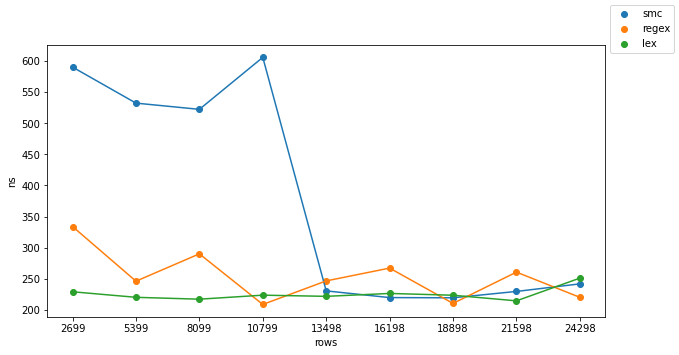

In [16]:
labas = [smc, regex, lex]
names = ['smc', 'regex', 'lex']
pds = list(map(test2, labas))
graph(pds, names)

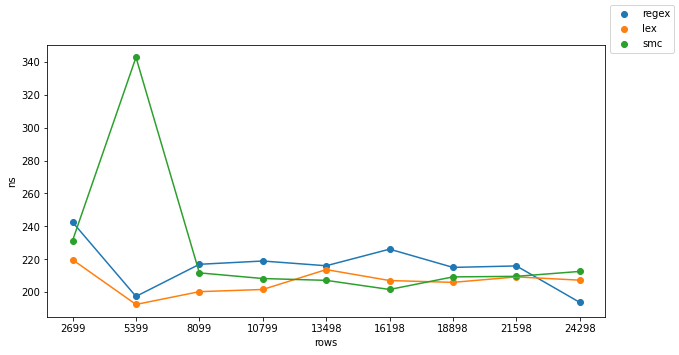

In [18]:
labas = [regex, lex, smc]
names = ['regex', 'lex', 'smc']
pds = list(map(test2, labas))
graph(pds, names)